<h1><center><span style='color:Balck'>DSC530-T302 Data Exploration and Analysis (2233-1)</span></center></h1>
<h1><center><span style='color:Balck'>Final project: EDA on Loan Prediction dataset</span></center></h1>
<h1><center><span style='color:blue'>Arash Mahmooudian</span></center></h1>

## About the Dataset

The Loan Prediction dataset is consist of records for 614 different applicants and their application status. Following is the list of available 13 variables in the dataset and their descriptions:

 * Loan_ID:  Is a String value that represents the applicant's ID.
 * Gender:   Is a String value that represets applicants gender type (Male/Female).
 * Married:  Is a String value that represent the applicants marital status (Yes/No).
 * Dependents: Is an Integer value that shows number applicants dependents. 
 * Education:  Is a String value showing the applicants education level.
 * Self_Employed: Is a String value showing applicants self employement status (Yes/No).
 * ApplicantIncome: Is an Integer value that shows applicants annual income.
 * CoapplicantIncome: Is an Integer value that show Co'applicants annual income
 * LoanAmount: Is an Integer value that shows the amount of requested loan upto to $700.
 * Loan_Amount_Term: Is an Integer value that shows the length of Loan based on days
 * Credit_History: Is an Integer value showing Credit_history availability (0/1)
 * Loan_Status: Is a String value showing the Loan Approval status (Y/N)

#### Goal:
Predict Loan approval for applicants.
The question are Married applicants are tend to apply for higher LoanAmount than single applicants.

In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import thinkplot
import thinkstats2

In [2]:
df_loan = pd.read_csv('Loan Predication.csv')
print(df_loan.shape)
df_loan.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Problem Statement:
 * 1- Married applicants are tend are to apply for a higher amonut of Loan than the Singles.

### Variables of Interest:

Following the problem statemen below variables have been used to examine the hypothesis

 * Loan_ID: Is a String value that represents the applicant's ID.
 * Married: Is a String value that represent the applicants marital status (Yes/No).
 * Education: Is a String value showing the applicants education level.
 * ApplicantIncome: Is an Integer value that shows applicants annual income.
 * CoapplicantIncome: Is an Integer value that show Co'applicants annual income
 * LoanAmount: Is an Integer value that shows the amount of requested loan upto to $700
 * Loan_Status: Is a String value showing the Loan Approval status (Y/N)
 

In [4]:
df = df_loan[['Loan_ID','Gender','Married','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Education          614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 38.5+ KB


## Data Evaluation & Transformation

In [5]:
print(df.Married.value_counts())   # There are 8 NULL Values in this variable which needs to be dropped
print(df.shape)
df = df.dropna()                   # All rows having NULL values are dropped
print(df.shape)
df.info()

Yes    398
No     213
Name: Married, dtype: int64
(614, 8)
(577, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 1 to 613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            577 non-null    object 
 1   Gender             577 non-null    object 
 2   Married            577 non-null    object 
 3   Education          577 non-null    object 
 4   ApplicantIncome    577 non-null    int64  
 5   CoapplicantIncome  577 non-null    float64
 6   LoanAmount         577 non-null    float64
 7   Loan_Status        577 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 40.6+ KB


Male      468
Female    109
Name: Gender, dtype: int64
Yes    374
No     203
Name: Married, dtype: int64


<AxesSubplot:>

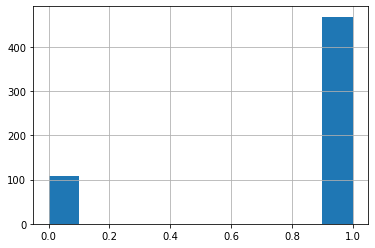

In [6]:
print(df.Gender.value_counts())
df['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)    # 1: Male and 0: Female
print(df.Married.value_counts())

df.Gender.hist() # Plots histogram

Yes    374
No     203
Name: Married, dtype: int64
1    374
0    203
Name: Married, dtype: int64


<AxesSubplot:>

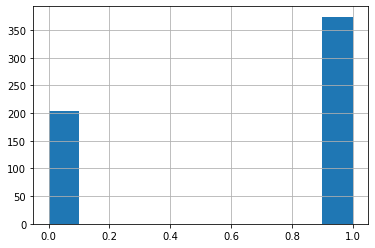

In [7]:
print(df.Married.value_counts())
df['Married'].replace(['Yes', 'No'], [1, 0], inplace=True)    # 1: Married and 0: Single
print(df.Married.value_counts())

df.Married.hist() # Plots histogram

Graduate        451
Not Graduate    126
Name: Education, dtype: int64
1    451
0    126
Name: Education, dtype: int64


<AxesSubplot:>

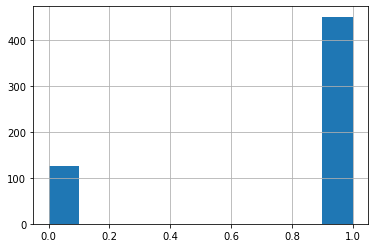

In [8]:
print(df.Education.value_counts())
df['Education'].replace(['Graduate', 'Not Graduate'], [1, 0], inplace=True)  # 1: Graduate and 0:Not Graduate
print(df.Education.value_counts())

df.Education.hist() # Plots histogram

2500    9
4583    6
2600    6
6000    6
3750    5
Name: ApplicantIncome, dtype: int64 


Income range:150 to 81000


<AxesSubplot:>

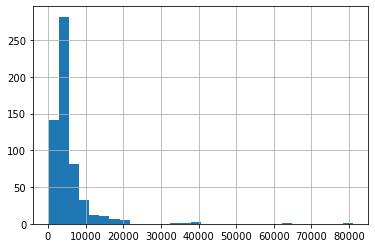

In [9]:
print(df.ApplicantIncome.value_counts().head(), '\n\n')
print(f'Income range:{df.ApplicantIncome.min()} to {df.ApplicantIncome.max()}')

df.ApplicantIncome.hist(bins = 30) # Plots histogram

# Applicants income meanly is less than $10000

0.0       254
2083.0      5
2500.0      5
1666.0      5
5625.0      3
Name: CoapplicantIncome, dtype: int64 


Income range: $0 to $41667


<AxesSubplot:>

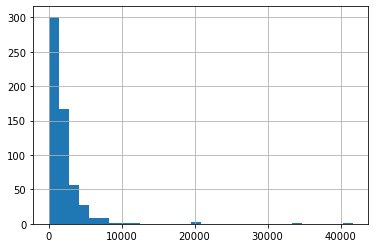

In [10]:
print(df.CoapplicantIncome.value_counts().head(), '\n\n')
print(f'Income range: ${int(df.CoapplicantIncome.min())} to ${int(df.CoapplicantIncome.max())}')

df.CoapplicantIncome.hist(bins = 30) # Plots histogram

# CoApplicants income are mostly less than $10000

120.0    20
110.0    16
100.0    15
187.0    12
128.0    11
Name: LoanAmount, dtype: int64 


Income range:$ 9 to $650


<AxesSubplot:>

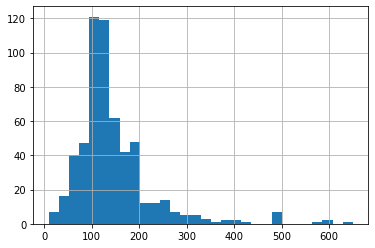

In [11]:
print(df.LoanAmount.value_counts().head(), '\n\n')
print(f'Income range:$ {int(df.LoanAmount.min())} to ${int(df.LoanAmount.max())}')

df.LoanAmount.hist(bins = 30) # Plots histogram

# Most applicants are applying for a loan amount around $120

Y    401
N    176
Name: Loan_Status, dtype: int64
1    401
0    176
Name: Loan_Status, dtype: int64


<AxesSubplot:>

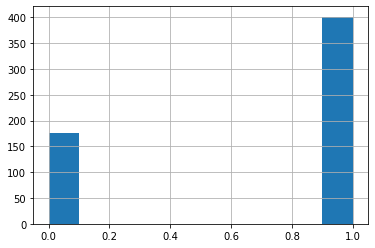

In [12]:
print(df.Loan_Status.value_counts())
df['Loan_Status'].replace(['Y', 'N'], [1, 0], inplace=True)  # 1: Approved and 0: Refused
print(df.Loan_Status.value_counts())

df.Loan_Status.hist() # Plots histogram

# Outlier Evaluation

 * No outliers are observed in the 0/1 variables ('Gender', 'Married', 'Education', 'Loan_Status', 'Loan_Status')
 * ApplicantIncome boxplot showing some off numbers, however they belong to the high income applicants
 * CoapplicantIncome boxplot showing some off numbers, however they belong to the high income applicants

<AxesSubplot:>

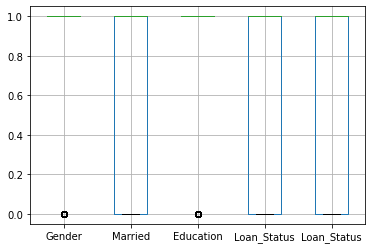

In [13]:
# First we will plot boxplot for the variables having only 0/1 values
boxplot = df.boxplot(column=['Gender', 'Married', 'Education', 'Loan_Status', 'Loan_Status'])
boxplot

# As these Variables are only representing a boolean values, no outliers are observed

<AxesSubplot:>

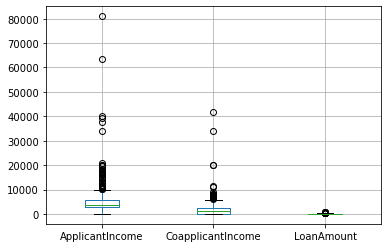

In [14]:
boxplot = df.boxplot(column=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])
boxplot

# No outliers are observed, those points looks extreme belongs to high income applicants/coapplicants

In [15]:
# Observe the statistical insights of the dataframe
print(df.describe(), '\n\n')

print('Variance: \n',df.var())

           Gender     Married   Education  ApplicantIncome  CoapplicantIncome  \
count  577.000000  577.000000  577.000000       577.000000         577.000000   
mean     0.811092    0.648180    0.781629      5297.119584        1651.006794   
std      0.391775    0.477952    0.413499      5853.236196        2994.669928   
min      0.000000    0.000000    0.000000       150.000000           0.000000   
25%      1.000000    0.000000    1.000000      2889.000000           0.000000   
50%      1.000000    1.000000    1.000000      3800.000000        1229.000000   
75%      1.000000    1.000000    1.000000      5746.000000        2333.000000   
max      1.000000    1.000000    1.000000     81000.000000       41667.000000   

       LoanAmount  Loan_Status  
count  577.000000   577.000000  
mean   144.968804     0.694974  
std     82.704182     0.460818  
min      9.000000     0.000000  
25%    100.000000     0.000000  
50%    127.000000     1.000000  
75%    167.000000     1.000000  
max   

C:\Users\Arash\AppData\Local\Temp/ipykernel_16336/551938652.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Variance: \n',df.var())


## PMF and CDF based on Marital Status and Loan Amount

 * Married Applicants
 * Single Applicants
 
 
 * In order to plot the Pmf and Cmf we need to create a new variable to hold LoanAmount based on a ranges of $5

12    33
15    33
3     31
1     30
10    28
Name: LoanAmountCats, dtype: int64 




<AxesSubplot:>

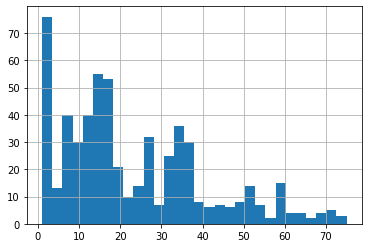

In [16]:
# Bining the LoanAmount variable on a bins of $5
bins = [i for i in range(0, 700, 5)]
df['LoanAmountCats'] = pd.cut(x=df['LoanAmount'], bins=bins)
bins = list(df.LoanAmountCats.drop_duplicates())
cats = [i for i in range(1, (len(bins)+1))]                 # Holds the categories ranging from 1 to 76 : Amount = cat * $5
df['LoanAmountCats'].replace(bins,cats, inplace=True)
print(df.LoanAmountCats.value_counts().head(), '\n\n')
df.LoanAmountCats.hist(bins = 30) # Plots histogram


In [17]:
# Create 2 seperated dataframes based on marital status married/single

df_married = df [df['Married'] == 1]
df_single = df [df['Married'] == 0]
print(f' Married table shape: {df_married.shape}')
print(f' Single table shape: {df_single.shape}')

 Married table shape: (374, 9)
 Single table shape: (203, 9)


## Mean of two datasets:


 * Mean of LoanAmount for married applicants is \$ 153.95.
 * Mean of LoanAmount for single applicants is \$ 128.415.
 
 
* Mean of ApplicantIncome for married applicants is \$ 5475.65
* Mean of ApplicantIncome for single applicants is \$ 4968.20 

In [18]:
df_married.describe()

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,LoanAmountCats
count,374.000000,374.0,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.917112,1.0,0.778075,5475.649733,1807.301925,153.954545,0.727273,23.435829
std,0.276082,0.0,0.416098,6621.144960,2068.140361,85.842680,0.445958,18.026341
min,0.000000,1.0,0.000000,150.000000,0.000000,17.000000,0.000000,1.000000
25%,1.000000,1.0,1.000000,2883.750000,0.000000,107.250000,0.000000,10.000000
50%,1.000000,1.0,1.000000,3867.000000,1625.000000,131.000000,1.000000,17.500000
75%,1.000000,1.0,1.000000,5818.750000,2491.500000,177.500000,1.000000,34.000000
max,1.000000,1.0,1.000000,81000.000000,20000.000000,600.000000,1.000000,74.000000


In [19]:
df_single.describe()

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,LoanAmountCats
count,203.000000,203.0,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000
mean,0.615764,0.0,0.788177,4968.20197,1363.054187,128.413793,0.635468,22.162562
std,0.487617,0.0,0.409610,4071.11102,4188.758004,73.973880,0.482489,16.674762
min,0.000000,0.0,0.000000,416.00000,0.000000,9.000000,0.000000,1.000000
25%,0.000000,0.0,1.000000,2908.50000,0.000000,86.000000,0.000000,10.000000
50%,1.000000,0.0,1.000000,3750.00000,0.000000,116.000000,1.000000,17.000000
75%,1.000000,0.0,1.000000,5253.50000,1796.500000,144.500000,1.000000,34.000000
max,1.000000,0.0,1.000000,37719.00000,41667.000000,650.000000,1.000000,75.000000


In [20]:
df_married.head()

,Loan_ID,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,LoanAmountCats
1,LP001003,1,1,1,4583,1508.0,128.0,0,1
2,LP001005,1,1,1,3000,0.0,66.0,1,2
3,LP001006,1,1,0,2583,2358.0,120.0,1,3
5,LP001011,1,1,1,5417,4196.0,267.0,1,5
6,LP001013,1,1,0,2333,1516.0,95.0,1,6


In [21]:
df_single.head()

,Loan_ID,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,LoanAmountCats
4,LP001008,1,0,1,6000,0.0,141.0,1,4
13,LP001029,1,0,1,1853,2840.0,114.0,0,12
15,LP001032,1,0,1,4950,0.0,125.0,1,14
16,LP001034,1,0,0,3596,0.0,100.0,1,15
17,LP001036,0,0,1,3510,0.0,76.0,0,16


### Pmf:

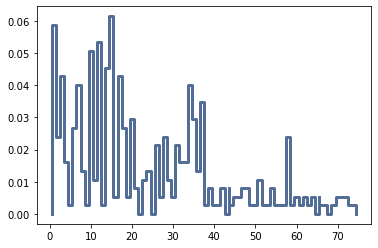

In [22]:
pmf_married = thinkstats2.Pmf(df_married.LoanAmountCats, label="Married") 
thinkplot.Pmf(pmf_married) 

# As seen befor on histogram the probablity of appling for low LoanAmount is higher than high Loan Amount
# for married applicants

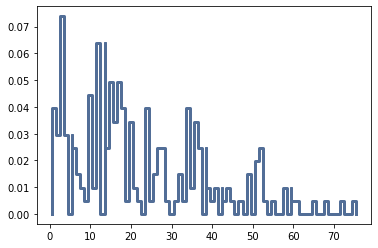

In [23]:
pmf_single = thinkstats2.Pmf(df_single.LoanAmountCats, label="Single") 
thinkplot.Pmf(pmf_single) 

# As seen befor on histogram the probablity of appling for low LoanAmount is higher than high Loan Amount
# for single applicants

#### Pmf Interpretation: 
It seems married applicants tend to apply for higher amount of loans

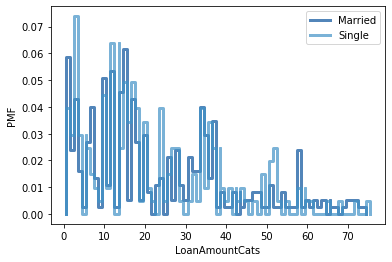

In [24]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_married, pmf_single])
thinkplot.Config(xlabel="LoanAmountCats", ylabel="PMF")

### Cdf:


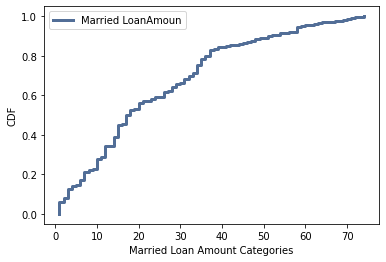

In [25]:
cdf_married = thinkstats2.Cdf(df_married.LoanAmountCats, label='Married LoanAmoun')
thinkplot.Cdf(cdf_married)
thinkplot.Config(xlabel='Married Loan Amount Categories', ylabel='CDF', loc='upper left')

# Sharp increase between 0 to 20 (upto $100) is being observed for married applicants
# almost 55% of married applicats have applied a LoanAmount less than $100

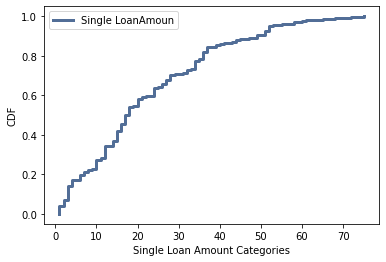

In [26]:
cdf_single = thinkstats2.Cdf(df_single.LoanAmountCats, label='Single LoanAmoun')
thinkplot.Cdf(cdf_single)
thinkplot.Config(xlabel='Single Loan Amount Categories', ylabel='CDF', loc='upper left')

# The slop of CMF for singles as copmared to married applicants seems to be sharper.
# 60% of applicants have applied for a LoanAmount less than $100

#### Cdf Interpretation:
We can see that singles are slightly tend to apply for low amount of Loans in some areas but not constantly.
60% of singles have applied for a LoanAmount of less than $100 whereas only 55\% of married applied.

Areas between 20 and 35 clearly illustrates this differences

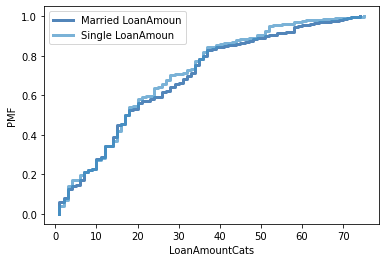

In [27]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_married, cdf_single])
thinkplot.Config(xlabel="LoanAmountCats", ylabel="PMF")

## Analytical Distribution
We will examine two (Normal and Lognormal) probablity distribution to see which one is a better fit for our data.


### A - Normal Probablity Distribution

Provided Normal Probablity Distribution shows this distribution is not an approriare model for the this dataset:
 * 1 - Both Low & High tails deviate from the fitted line clearly.
 * 2 - Higher tail data distribution shows a non-linear behaviour
 * 3 - Arround the mean the data shows less deviation to the fitted line.
 
##### Considering above items the Normal Probablity Distribution doesn't seem to be an appropriate model

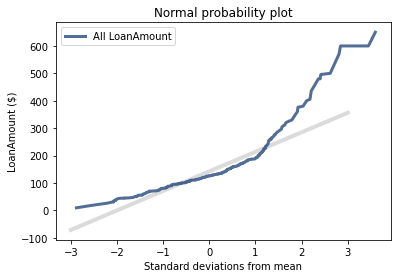

In [28]:
LoanAmount = df['LoanAmount']
mean, var = thinkstats2.TrimmedMeanVar(LoanAmount, p=0.01)
std = np.sqrt(var)

xs = [-3, 3]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(LoanAmount)
thinkplot.Plot(xs, ys, label="All LoanAmount")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="LoanAmount ($)",)

In [29]:
def MakeNormalModel(LoanAmount):
    """Plots a CDF with a Normal model.

    LoanAmount: sequence
    """
    cdf = thinkstats2.Cdf(LoanAmount, label="LoanAmount")

    mean, var = thinkstats2.TrimmedMeanVar(LoanAmount)
    std = np.sqrt(var)
    print("n, mean, std", len(LoanAmount), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

n, mean, std 577 142.1957671957672 71.29199798569516


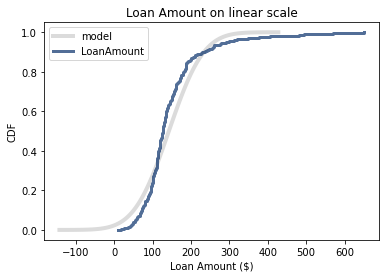

In [30]:
MakeNormalModel(LoanAmount)
thinkplot.Config(
    title = "Loan Amount on linear scale",
    xlabel = "Loan Amount ($)",
    ylabel = "CDF",
    loc = "upper left",)

### B - Lognormal Probablity Distribution

* Eventhough there are some minor devaiation between the model and our data, the Lognormal model seems to be a better fit for
  our data as compared to the Normal Probablity .

n, mean, std 577 2.1078803290157224 0.1956002437720298


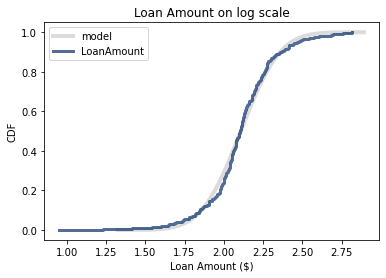

In [31]:
log_LoanAmount = np.log10(LoanAmount)
MakeNormalModel(log_LoanAmount)
thinkplot.Config( title="Loan Amount on log scale",
                  xlabel="Loan Amount ($)", ylabel="CDF",)

## Correlation
   In this section we will try to find the relationship between the applicant's income and the applied loan amount.
   First we will examine the Covariance, then Pearson’s correlation and Non-Linear Relationships between them.
 

### Covariance

 * Following shows there is a positive correlation between the Applicant's Income and the applied Loan Amounts. It means
  The more Income the more Loan Amount was required by the applicants. However it is hard to intrepret the Cov value.

In [32]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [33]:
# Correlation for married applicants
ApplicantIncome, LoanAmount = df_married.ApplicantIncome, df_married.LoanAmount
married_cov = Cov(ApplicantIncome, LoanAmount)

# Correlation for married applicants
ApplicantIncome, LoanAmount = df_single.ApplicantIncome, df_single.LoanAmount
single_cov = Cov(ApplicantIncome, LoanAmount)

ApplicantIncome, LoanAmount = df.ApplicantIncome, df.LoanAmount
overall_cov = Cov(ApplicantIncome, LoanAmount)

print('ApplicantIncome Covariance with LoanAmount: ')
print(f'Married: {round(married_cov,2)}')
print(f'Single: {round(single_cov,2)}')
print(f'Total: {round(overall_cov,2)}')

ApplicantIncome Covariance with LoanAmount: 
Married: 306663.15
Single: 154556.86
Total: 256104.72


### Pearson’s correlation

The Pearson’s correlation is only for linear relationships and varies between -1/+1. Positive 0.53 shows a strong correlation between these two variables. It shows  high income applicants tend to apply for higher loan amounts.

In [34]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [35]:
# Correlation for married applicants
ApplicantIncome, LoanAmount = df_married.ApplicantIncome, df_married.LoanAmount
married_corr = Corr(ApplicantIncome, LoanAmount)

# Correlation for married applicants
ApplicantIncome, LoanAmount = df_single.ApplicantIncome, df_single.LoanAmount
single_corr = Corr(ApplicantIncome, LoanAmount)

ApplicantIncome, LoanAmount = df.ApplicantIncome, df.LoanAmount
overall_corr = Corr(ApplicantIncome, LoanAmount)

print('ApplicantIncome Correlation with LoanAmount:')
print(f'Married: {round(married_corr,2)}')
print(f'Single: {round(single_corr,2)}')
print(f'Total: {round(overall_corr,2)}')

ApplicantIncome Correlation with LoanAmount:
Married: 0.54
Single: 0.52
Total: 0.53


### Non-Linear Relationships

#### Expected Correlation between LoanAmountCats and ApplicantIncome:

We are expecting a positive correlation betweeb these variables meaning that normally high income applicants apply for a higher amount of loans.

Considering the scatter plot of LoanAmountCats and ApplicantIncome, we can say Pearson’s correlation (0.53) is valid as it not falling in any of non-linear relationshiop categories

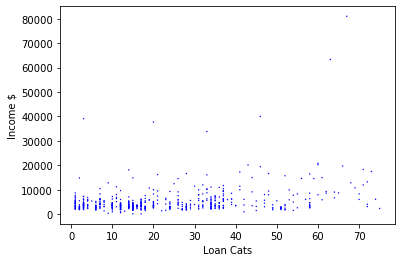

In [36]:
LoanAmountCats = df.LoanAmountCats
thinkplot.Scatter(LoanAmountCats, ApplicantIncome, alpha=0.99, s=2)
thinkplot.Config(xlabel='Loan Cats', ylabel='Income $',legend=False)

#### Expected Correlation between LoanAmountCats and CoapplicantIncome:

We are expecting positive correlation betweeb these variables meaning that higher loan amont needs high income co-applicant income.

Considering the scatter plot of LoanAmountCats and CoapplicantIncome, we can say Pearson’s correlation (0.20) is valid and there is a weak correlation between these two variables.

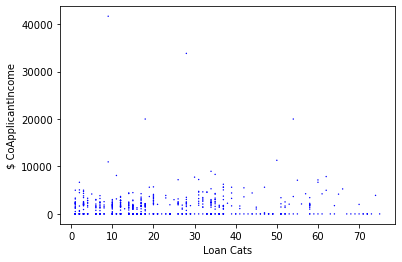

In [37]:
LoanAmountCats = df.LoanAmountCats
CoapplicantIncome = df.CoapplicantIncome
thinkplot.Scatter(LoanAmountCats, CoapplicantIncome, alpha=0.99, s=2)
thinkplot.Config(xlabel='Loan Cats', ylabel='$ CoApplicantIncome',legend=False)

In [38]:
Corr(CoapplicantIncome, LoanAmount)

0.20704463348373411

## Hypothesis Testing

* First Hypothesis: The distribution of Loan Amount for both Single and Marrid are same
* Second Hypothesis: The distribution of Loan Amount for single applicants are tend to be less than married applicants.

### First hypothesis:
The p-value is about 39%, which means it is plausible that the observed difference is just the result of random sampling, and might not be generally true in the population.

In [39]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
#------------------------------------------------------------------------------------    
    
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat
#------------------------------------------------------------------------------------     

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [40]:
data = df_single.LoanAmountCats.values, df_married.LoanAmountCats.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.404

Under the null hypothesis, we often see differences bigger than the observed difference

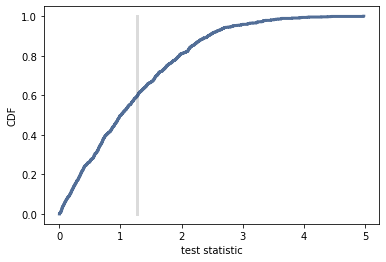

In [41]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic', ylabel='CDF')

### Second hypothesis:

The hypothesis under test is that single applicants tend to apply for low loan amounts, the appropriate test statistic is the raw difference between single applications and marrieds, rather than the absolute value of the difference.
#####  in this example, the result is still not statistically significant. p-value ~ 0.80

In [42]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.8

### Testing correlation:

The reported p-value is 0, which means that in 1000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. That means that the p-value is probably smaller than 0.001 
, but it is not actually 0.


In [43]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [44]:
cleaned = df.dropna(subset=['Married', 'LoanAmountCats'])
data = cleaned.LoanAmountCats.values, cleaned.LoanAmountCats.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

## Regression Analysis

Using multinomial logistic regression and applying it to categorical variable maximum 58% accuracy is achieved.


In [45]:
# Mean od applied Loan Amount for married applicants is $ 25.5 more than single applicants
diff_Loan = df_married.LoanAmount.mean() - df_single.LoanAmount.mean()
diff_Income = df_married.ApplicantIncome.mean() - df_single.ApplicantIncome.mean()

print(f'Loan Mean Diff: $ {round(diff_Loan,1)}', f'\nIncome Mean Diff: $ {round(diff_Income,1)}')

Loan Mean Diff: $ 25.5 
Income Mean Diff: $ 507.4


In [46]:
df['Gender'].replace([1, 0], [True, False], inplace=True)  # True: Graduate and False:Not Graduate
df['Married'].replace([1, 0], [True, False], inplace=True)  # True: Graduate and False:Not Graduate
df['Education'].replace([1, 0], [True, False], inplace=True)  # True: Graduate and False:Not Graduate

df.head()

,Loan_ID,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,LoanAmountCats
1,LP001003,True,True,True,4583,1508.0,128.0,0,1
2,LP001005,True,True,True,3000,0.0,66.0,1,2
3,LP001006,True,True,False,2583,2358.0,120.0,1,3
4,LP001008,True,False,True,6000,0.0,141.0,1,4
5,LP001011,True,True,True,5417,4196.0,267.0,1,5


In [47]:
import statsmodels.formula.api as smf
formula='Loan_Status ~  C(Married) + C(Education) + ApplicantIncome + CoapplicantIncome + LoanAmountCats'
model = smf.logit(formula, data=df)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 0.603871
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  577
Model:                          Logit   Df Residuals:                      571
Method:                           MLE   Df Model:                            5
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                 0.01820
Time:                        01:26:38   Log-Likelihood:                -348.43
converged:                       True   LL-Null:                       -354.89
Covariance Type:            nonrobust   LLR p-value:                   0.02418
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4427      0.242      1.828      0.068      -0.032       0.918
C(Married)[T.True]       0.4723      0.189      2.494      0.013       0.101       0.843
C(Education)[T.True]     0.4424      0.218      2.025      0.043       0.014       0.871
ApplicantIncome      -1.412e-05   1.57e-05     -0.899      0.369   -4.49e-05    1.67e-05
CoapplicantIncome    -5.637e-05   3.23e-05     -1.745      0.081      -0.000    6.96e-06
LoanAmountCats          -0.0038      0.005     -0.685      0.493      -0.015       0.007
========================================================================================
"""

In [48]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

actual = endog['Loan_Status']
baseline = actual.mean()
baseline

0.6949740034662045

In [49]:
predict = (results.predict() >= 0.69)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(232.0, 106.0)

In [50]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
print(f'Accuracy: {round(acc * 100,2)}%')

Accuracy: 58.58%


#### Wrap up:

#### Loan application prediction dataset

The dataset was downloaded from kaggle via link: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset. Overall this dataset consists of records for 614 different applications having 13 explatory variables as described below:

* Loan_ID: Is a String value that represents the applicant's ID.
* Gender: Is a String value that represets applicants gender type (Male/Female).
* Married: Is a String value that represent the applicants marital status (Yes/No).
* Dependents: Is an Integer value that shows number applicants dependents.
* Education: Is a String value showing the applicants education level.
* Self_Employed: Is a String value showing applicants self employement status (Yes/No).
* ApplicantIncome: Is an Integer value that shows applicants annual income.
* CoapplicantIncome: Is an Integer value that show Co'applicants annual income
* LoanAmount: Is an Integer value that shows the amount of requested loan upto to $700.
* Loan_Amount_Term: Is an Integer value that shows the length of Loan based on days
* Credit_History: Is an Integer value showing Credit_history availability (0/1)
* Loan_Status: Is a String value showing the Loan Approval status (Y/N)

The main goal is to find a model to predict loan aaplication approval for a typical applicant using relationships between its variables.The focus of study is manily on the assumption that normally married applicant have more tendency to apply for a higher loan amount as compared to single applicants. This might be because of number of dependenices that married applicants have or other combination of possibilities. For simplicity we only focused on the main assumption and didn't evaluate the number of dependents or area of living of applicants. For this only 6/13 variables(Married, Education, ApplicantIncome, CoapplicantIncome, LoanAmountCats, Loan_Status) are selected for detail study. Additionaly 37 records were dropped from the dataset because of having missing values.

Studying histogram graphs for variables of interest we see that most of the applicants and co-applicants have an income of less than \\$10000 , and requested Loan amount of mainly around $120. After creating of two datasets based on marital status we see that mean of loan amount for married and singles are respectivly \\$153, \\$128, and mean applicant income of \\$5475 for marrieds and \\$4968 for singles indicating that generally married applicants have applied for a higher loan amouns.

Statistical study of PMF/CMF for both groups shows some degree of positive confirmation that in general married applicants have more tendency to apply for a higher loan amount as compared to singles. We can see that 60\% of single applicants have applied for amounts of less than \\$100 whereas only around 55\% of married applicants have applied for the same amount. However this is happening slightly but not consistently indicating that a need for deep study. Aligned with the results achieved previously and scatter plots of ApplicantIncome and LoanAmount there a positive correlation between mentioned variables (Marrieds: 0.54 and Singles: 0.52). Notably: even though there is a difference between these groups, but it is ignorable.

Coming to the proposed two hypothesis
First: The distribution of Loan Amount for both Single and Marrid are same. Insignificant p-value of around 0.39. 
Second: The distribution of Loan Amount for single applicants are tend to be less than married applicants. Insignificant p-value of 0.8.
P-valuses for both hypothesis show it is plausible that the observed difference is just the result of random sampling, and might not be generally true in a big population. This in turn is aligned to the correlation result because there there was a negligible difference around 0.2 (0.54 - 0.52 = 0.02).

Finally a multi-variable logestic regression model is used to predict the loan aaplication approval using the variables of interest (Married, Education, ApplicantIncome, CoapplicantIncome, LoanAmountCats). The model provides 58% accuracy for loan approval status prediction.

Conclusion:
The dataset only represents a samll number of population (only 614 application). Having a dataset with more samples can provide more resolution and the result can be inferenced with more confidence for a broad population. Therefore, generally speakingthe assumptions and findlings related to them in this study are not certain, however we can say the findings are true for the provided dataset.
It also needs to be mentioned that using data mining on all 13 variables of the dataset might suggests some more correlated variables to our model and could increase the accuracy of the model.


## SKLEARN Logestic Regression Model

As compared to the prviously applied logestic model below we will try to predict the loan approval status using python sklearn module

#### Following applying logestic regression using python sklearn module provides 77.5% accuracy

In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

### Data Cleaning

In [52]:
df = pd.read_csv('Loan Predication.csv')
df.dropna(inplace=True)
df['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)    # 1: Male and 0: Female
df['Married'].replace(['Yes', 'No'], [1, 0], inplace=True)    # 1: Married and 0: single
df['Education'].replace(['Graduate', 'Not Graduate'], [1, 0], inplace=True)    # 1: Graduate and 0: Not Graduate
df['Self_Employed'].replace(['Yes', 'No'], [1, 0], inplace=True)    # 1: Yes and 0: No
df['Property_Area'].replace(['Rural', 'Urban', 'Semiurban'], [0, 1, 2], inplace=True)    # 0: Rural and 1: Urban, 2:Semiurban 


df['Dependents'] = df['Dependents'].astype(str)
df['Dependents'] = df['Dependents'].str.replace('+', '')

C:\Users\Arash\AppData\Local\Temp/ipykernel_16336/3882159089.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace('+', '')


#### Define Dependent and independent variables

In [53]:
diab_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'] 
X = df[diab_cols]  # Features
y = df.Loan_Status # Target variable 

#### Define train and test datasets

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) 
logreg =  LogisticRegression(solver='liblinear') 
logreg.fit(X_train,y_train) 
y_pred=logreg.predict(X_test) 

#### Plot cnf_matrix heat map

In [55]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cnf_matrix 

array([[16, 26],
       [ 1, 77]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

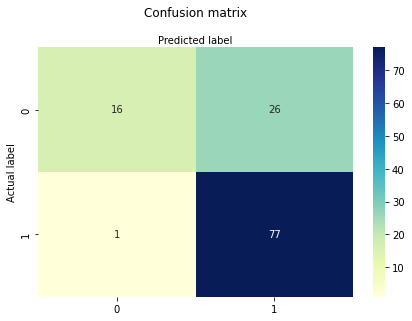

In [56]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

#### Model accuracy

In [57]:
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)*100}%') 

Accuracy: 77.5%
